##Class 9
### 29 June 2015

#*Bias-Variance Tradeoff*
- Black line is not the decision boundary but the ideal distinction?
- Low k
    - high variance
        - how much does it vary for a particular point between realizations of the model
        - there's a lot of change
    - low bias: how well does it match the training data?
    - overfitting the model: trying to follow, match every prediction rather than the underlying signal
- High k
    - high bias: when compared to training data, it doesn't really capture the same signal
    - low variance: generally the color distribution doesn't change that much
- How do we choose the correct model?
- By changing a tuning parameter (e.g. k) you change the complexity of the model, thus changing the tradeoff between bias and variance
    - Finding the optimum model complexity
    - A low tuning parameter (k) indicates higher model complexity
        - lower k makes the predictions more complex (not as smooth as the larger, more bias-resulting k values)

#Model Evaluation

- Create a procedure that *estimates* how well a model is likely to perform on out-of-sample data and use that to choose between models
- k = 1 generally does not "generalize" because it fits the noise too much
- want a model that best generalizes

###*Train and test on entire data set*###
1. Train the model on the entire dataset
2. Test model on the same exact data, and compare how well the model predicted by comparing the predicted response values with actual response values.

In [2]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [3]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [4]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [5]:
# store response vector in "y"
y = iris.species_num

In [7]:
X.shape

(150, 4)

In [8]:
# X is our new data frame, with a shape of 150 x 4 bc we want to use those 4 features

**KNN (K=50)**

In [8]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=50)

# train the model on the entire dataset
knn.fit(X, y)

# predict the response values for the observations in X ("test the model")
# makes predictions for all 150
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
# store the predicted response values
y_pred = knn.predict(X)

**Evaluation Metric**
- a numeric calculation to quantify the performance of the model
- choose one based on goals of problem
- most common choice for classification:
    - Classification accuracy: a reward function, % of correct predictions --> something you want to maximize
    - Classification error: loss function, % of incorrect predictions --> something you want to minimize
    - error = (1 - accuracy)
- we're using accuracy

In [10]:
# compute classification accuracy
# within metrics, there are a lot of different metrics available
# always need y and y_pred (actual vs predicted)
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.94


With k = 50, the model has 94% correct predictions

AKA **training accuracy** because it's being tested on the training data, on the data used to build the model.

In [11]:
# Trying KNN with k = 1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


But we know that k=1 is not the best value for k because despite being low bias, it has high variance.
- Of course it has low bias. It's using the exact same data, with a super complex model, to predict responses which are going to be close to or exact to the observed responses

Training accuracy: rewards overly complex models that won't necessarily generalize
- Unnecessarily complex models overfit the training data
- Learns the "noise" rather than the "signal"
- Building a model too complex learns the quirks of your training data
- Not a good estimate of out-of-sample accuracy

###*Train/test split*###

1. Split the data into two pieces: training and testing
2. Train the model on the training set
3. Test the model on the testing set-- how well did we do?

In [12]:
## "unpacking"
def min_max(nums):
    smallest = min(nums)
    largest = max(nums)
    return [smallest, largest]
# function that returns a list of the smallest and largest value

In [14]:
min_and_max = min_max([1, 2, 3])
print min_and_max
print type(min_and_max)

[1, 3]
<type 'list'>


In [16]:
the_min, the_max = min_max([1, 2, 3]) # this is the unpacking. Can be unpacked into separate variables
print the_min
print type(the_min)
print the_max
print type(the_max)

1
<type 'int'>
3
<type 'int'>


In [18]:
# using the train-test-split function
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# by setting test_size = 0.4 --> second object (test) gets 40% of the data
# training data set should have 90 records, the test data should have 60 records
# X_train and y_train are corresponding records
# pseudo-random split, will get new sets everytime you run this code EXCEPT random_state=(any number) keeps the sets the same
# random_state is a way to build reproducibility in the code

In [15]:
# before splitting
print X.shape

# after splitting
print X_train.shape
print X_test.shape

(150, 4)
(90L, 4L)
(60L, 4L)


In [16]:
# before splitting
print y.shape

# after splitting
print y_train.shape
print y_test.shape

(150L,)
(90L,)
(60L,)


Testing accuracy: better estimate than training accuracy of out-of-sample performance
- response values for the testing set is already known, so the predictions can be evaluated

*Using K = 1*

In [20]:
# STEP 1: split X and y into training and testing sets (using random_state parameter for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [21]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [23]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


In [33]:
# testing using K = 50

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.933333333333


Turns out k = 50 is too high bias (and low variance)

In [34]:
# calculate TRAINING ERROR and TESTING ERROR for K=1 through 50
# usually you're only calculating training OR testing error

k_range = range(1, 51)
training_error = []
testing_error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # training error
    knn.fit(X, y)
    y_pred = knn.predict(X)
    training_error.append(1 - metrics.accuracy_score(y, y_pred))
    # testing error
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

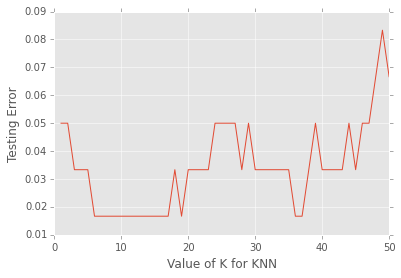

In [35]:
%matplotlib inline
# ^ allows plots to appear in notebook

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot the relationship between K and TESTING ERROR
plt.plot(k_range, testing_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

Kind of see a U-shape... most stable area of minimum area is around k=6 - k=17

When given the measurements of an unknown iris, we estimate that we would be able to correctly predict its species 98% of the time

In [36]:
# Training error vs Testing error
# create a DataFrame of K, training error, and testing error
df = pd.DataFrame({'K': k_range, 'train':training_error, 'test':testing_error}).set_index('K')
df.head()

,test,train
K,,
1,0.050000,0.000000
2,0.050000,0.020000
3,0.033333,0.040000
4,0.033333,0.040000
5,0.033333,0.033333


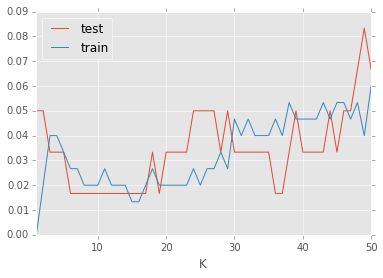

In [37]:
# plot the relationship between K and both TRAINING ERROR and TESTING ERROR
df.plot()

As model complexity increases (go left) training error goes down

###Making predictions on out-of-sample data###

Now that we know that k=11 is probably optimum model complexity...

In [38]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# re-train the model with X and y (not X_train and y_train) - why?
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([3, 5, 4, 2])

array([1], dtype=int64)

###Disadvantages of train/test split?###

What happens if it had split differently? Will that change the results?

In [39]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.933333333333


Testing accuracy can change widely based on the split. 
- High-variance estimate of out-of-sample accuracy
- K-fold cross-validation overcomes this limitation and provides more reliable estimates
- Train-test-split still useful because of flexibility and speed